In [206]:
import numpy as np
import pandas as pd
import ast
from datetime import datetime
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [207]:
import os
root = os.getcwd()

In [208]:
yelp=pd.read_csv(root + "/../yelp/processed.csv")

## one-hot: attributes

In [209]:
import ast
nonstr = ast.literal_eval(yelp["attributes"].values[0])

import ast
def str2dict(strJson):
  nonstr = ast.literal_eval(strJson)
  
  for i in nonstr:
    nonstr[i]=ast.literal_eval(nonstr[i])

  return nonstr

  df=pd.json_normalize(nonstr)
  df.columns="attributes."+df.columns
  return df

def dict2df(colName):
  targetDict=np.array([])
  for i in yelp[colName].values:
    targetDict = np.append(targetDict, str2dict(i))

  targetDF=pd.json_normalize(targetDict)
  targetDF.columns = colName + "." + targetDF.columns
  return targetDF

attDF=dict2df("attributes")
attDF=attDF.fillna(False)

attDF=attDF[attDF.dtypes[attDF.dtypes=="bool"].keys()]
attDF.isnull().sum().sum()

0

# String ID to Integer ID

In [210]:
userEncoder = LabelEncoder()
userIID = userEncoder.fit_transform(yelp["user_id"])
yelp["userIntID"]=pd.Series(userIID)

In [211]:
restEncoder = LabelEncoder()
restIID = restEncoder.fit_transform(yelp["business_id"])
yelp["restIntID"]=pd.Series(restIID)
yelp

,review_id,user_id,business_id,review_star,date,text,name,address,latitude,longitude,...,review_count,attributes,categories,hours,user_name,friends,user_stars,additional_text,userIntID,restIntID
0,KY8dRN_k2EoR_QujKAegTQ,ARFM4LrI_zxogm1L29ZKng,UmjITdXHhEF46ho6IhaGQg,3.0,2019-02-14 17:06:51,Delete out at this Dave and busters was a litt...,Dave & Buster's,"1200 Poydras St, Unit 601",29.950516,-90.076204,...,351,"{'HappyHour': 'True', 'GoodForKids': 'True', '...","Adult Entertainment, Sports Bars, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-23:59',...",Farrah,"iLYJxAravwLXXKj7GLHo9g, zY9qmzJ4QCxejVAvkFiDyw...",3.94,"When you dine in, the food is delivered to you...",1949,914
1,o_Zi01b_Vr0_8EIqEPDDVQ,ARFM4LrI_zxogm1L29ZKng,EME5hqQLjBD7e2cLryupbA,5.0,2019-03-26 17:02:43,I had an amazing time at Mr. Ed's and the food...,Mr Ed's Oyster Bar - Bienville,512 Bienville St,29.953705,-90.066015,...,1306,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Cajun/Creole, Southern, French, Salad, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...",Farrah,"iLYJxAravwLXXKj7GLHo9g, zY9qmzJ4QCxejVAvkFiDyw...",3.94,"For faster seating, use the app to check in be...",1949,447
2,IRHj0qVq1m9jN7z6GkZ1Fg,qQLZBmmnAvi9N7_Bymc6hA,UmjITdXHhEF46ho6IhaGQg,1.0,2020-01-31 07:24:56,Took forever to get drinks. Were told there wa...,Dave & Buster's,"1200 Poydras St, Unit 601",29.950516,-90.076204,...,351,"{'HappyHour': 'True', 'GoodForKids': 'True', '...","Adult Entertainment, Sports Bars, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-23:59',...",Troy,"3JXtg9i8cJtyxJEecanUyw, px1O23z7UNygl7h1Zp0Blw...",2.55,Their hours have changed for the fall 2019...1...,9378,914
3,yBn5lrJ6ZxEvdC7BDJ-qdw,qQLZBmmnAvi9N7_Bymc6hA,UmjITdXHhEF46ho6IhaGQg,1.0,2019-12-28 05:23:47,Been here twice first and last time. It takes ...,Dave & Buster's,"1200 Poydras St, Unit 601",29.950516,-90.076204,...,351,"{'HappyHour': 'True', 'GoodForKids': 'True', '...","Adult Entertainment, Sports Bars, Restaurants,...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-23:59',...",Troy,"3JXtg9i8cJtyxJEecanUyw, px1O23z7UNygl7h1Zp0Blw...",2.55,Until we meet again!,9378,914
4,PaIK__J-Qm7Y3u-iA8kGQA,qQLZBmmnAvi9N7_Bymc6hA,xbgzX-_EpV6yH-6nf2LCNw,1.0,2019-12-26 12:55:21,Tried to give this place one more try. It is s...,McDonald's,3250 General Degaulle Dr,29.926163,-90.022580,...,23,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food, Restaurants, Sandwiches, Coffee & Tea, B...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Troy,"3JXtg9i8cJtyxJEecanUyw, px1O23z7UNygl7h1Zp0Blw...",2.55,they have the impossible burger!!!,9378,1754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31621,jvcrBHuO_9TdErc0TMqokw,eGqr3lwwonUATMeKp7QpHg,-ojG1NfFYuHN_oGsGK1W8Q,4.0,2021-03-16 04:17:03,"Saw this spot on Yelp, we were tired and hungr...",The Little Easy,634 Julia St,29.945644,-90.071374,...,52,"{'Alcohol': ""u'full_bar'"", 'CoatCheck': 'False...","Restaurants, Nightlife, Sandwiches, Sports Bar...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",Sheronda,"v2ErOtodrXqL6tOV9LBpYw, V-Iv7rt3301xvg0di3dTxg...",3.73,NaN,7291,22
31622,BEM9YZIiiSZEvQ93AJ4ACw,y6SzYr7xpMmpobNmWaTZTQ,7ZV31rGcDaT1pUKyvJF9Mg,5.0,2020-10-11 12:03:06,Holy sh*t. My favorite baker who opened and ra...,Celtica French Bakery,218 Robert E Lee Blvd,30.019734,-90.111988,...,29,"{'BusinessParking': ""{'garage': False, 'street...","Food, Restaurants, Bakeries, Breakfast & Brunc...","{'Wednesday': '7:0-15:0', 'Thursday': '7:0-15:...",Jennifer,"QaLpN4czjYMhNms2r45Iwg, RAdOVAGwzJG_ul8T46AR4A...",3.92,NaN,10705,259
31623,YFGer7LZzfgtLYc7EPc6lg,0qlZ8SHk2WrzG5dg_D9fBA,I1LP0Vg55lwufnoNREE1KA,1.0,2019-04-09 01:48:27,Writing this review in hopes of alerting the p...,McDonald's,2856 S Claiborne,29.941588,-90.095297,...,25,"{'GoodForKids': 'True', 'RestaurantsAttire': ""...","Restaurants, Coffee & Tea, Fast Food, Food, Bu...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Peggy,"WCPMwOPWjA

In [212]:
yelp[['userIntID', 'user_id']].to_csv('userid_map.csv', index = False)
yelp[['restIntID', 'business_id']].to_csv('restid_map.csv', index = False)

In [213]:
# oneYelp=pd.concat([yelp, attDF, timeDF, catDF], axis = 1)
oneYelp=pd.concat([yelp, attDF], axis = 1)

# Data for model

In [214]:
userRest = oneYelp[["userIntID", "restIntID", "review_star"]]
userRest.dtypes

userIntID        int64
restIntID        int64
review_star    float64
dtype: object

In [215]:
feature_DF = oneYelp.select_dtypes(include=bool)
feature_DF.dtypes

attributes.HappyHour                         bool
attributes.GoodForKids                       bool
attributes.BikeParking                       bool
attributes.CoatCheck                         bool
attributes.RestaurantsTableService           bool
                                             ... 
attributes.DietaryRestrictions.vegan         bool
attributes.DietaryRestrictions.kosher        bool
attributes.DietaryRestrictions.halal         bool
attributes.DietaryRestrictions.soy-free      bool
attributes.DietaryRestrictions.vegetarian    bool
Length: 68, dtype: object

In [216]:
(feature_DF.sum()>19000).loc[feature_DF.sum()>19000].index[:-1]

Index(['attributes.GoodForKids', 'attributes.BikeParking',
       'attributes.RestaurantsTableService', 'attributes.HasTV',
       'attributes.BusinessAcceptsCreditCards',
       'attributes.RestaurantsTakeOut', 'attributes.RestaurantsGoodForGroups',
       'attributes.BusinessParking.street'],
      dtype='object')

In [217]:
feature_DF=feature_DF[(feature_DF.sum()>19000).loc[feature_DF.sum()>19000].index[:-1]]

In [218]:
feature_DF=feature_DF.astype(int)

In [219]:
model_DF = pd.concat([userRest, feature_DF], axis=1)
model_DF

,userIntID,restIntID,review_star,attributes.GoodForKids,attributes.BikeParking,attributes.RestaurantsTableService,attributes.HasTV,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsTakeOut,attributes.RestaurantsGoodForGroups,attributes.BusinessParking.street
0,1949,914,3.0,1,1,1,1,1,1,1,0
1,1949,447,5.0,1,1,1,1,1,1,1,1
2,9378,914,1.0,1,1,1,1,1,1,1,0
3,9378,914,1.0,1,1,1,1,1,1,1,0
4,9378,1754,1.0,1,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
31621,7291,22,4.0,0,1,1,1,1,1,0,1
31622,10705,259,5.0,0,0,0,0,0,0,0,0
31623,336,567,1.0,1,0,0,1,1,1,1,0
31624,6831,1288,5.0,0,0,0,0,0,1,0,1


In [220]:
rr = model_DF[['userIntID', 'restIntID', 'review_star']]
rrr = model_DF.iloc[:, 1:].drop('review_star', axis = 1)

In [221]:
rrr

,restIntID,attributes.GoodForKids,attributes.BikeParking,attributes.RestaurantsTableService,attributes.HasTV,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsTakeOut,attributes.RestaurantsGoodForGroups,attributes.BusinessParking.street
0,914,1,1,1,1,1,1,1,0
1,447,1,1,1,1,1,1,1,1
2,914,1,1,1,1,1,1,1,0
3,914,1,1,1,1,1,1,1,0
4,1754,1,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
31621,22,0,1,1,1,1,1,0,1
31622,259,0,0,0,0,0,0,0,0
31623,567,1,0,0,1,1,1,1,0
31624,1288,0,0,0,0,0,1,0,1


# system

In [222]:
# PyTorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For data preprocess
import numpy as np
import csv
import os

# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd
import math
import datetime
from tqdm.auto import tqdm


In [223]:
# change str id to int id
def ids2i(df,sid,iid):
    id=df[[sid,iid]].drop_duplicates()
    id=id.set_index(iid)[sid].to_dict()
    id=dict(sorted(id.items()))
    return id

userIDs2i=ids2i(yelp,"user_id","userIntID")
restIDs2i=ids2i(yelp,"business_id","restIntID")

In [224]:
model_DF.iloc[3][3:]

attributes.GoodForKids                   1.0
attributes.BikeParking                   1.0
attributes.RestaurantsTableService       1.0
attributes.HasTV                         1.0
attributes.BusinessAcceptsCreditCards    1.0
attributes.RestaurantsTakeOut            1.0
attributes.RestaurantsGoodForGroups      1.0
attributes.BusinessParking.street        0.0
Name: 3, dtype: float64

In [225]:
class userData(Dataset):
    def __init__(self, data):
        self.data=data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        row=self.data.iloc[index]
        user=torch.tensor(row["userIntID"], dtype=torch.long)
        restaurant = torch.tensor(row["restIntID"], dtype=torch.long)
        rating = torch.tensor(row["review_star"], dtype=torch.float32)
        attributes = torch.tensor(row[3:], dtype=torch.long)

        return user, restaurant, rating, attributes

In [226]:
def dataloader(data, batch_size, shuffle, n_jobs=0):
    dataset = userData(data)
    dataloader = DataLoader(
        dataset, batch_size,
        shuffle, drop_last=False,
        num_workers=n_jobs, pin_memory=True)
    return dataloader

In [227]:
yelp_train, yelp_test=train_test_split(model_DF, test_size=0.2, random_state=4016)

batch_size=128

trainLoader = dataloader(yelp_train, batch_size=batch_size, shuffle=True)
valloader = dataloader(yelp_test, batch_size=batch_size, shuffle=False)

In [228]:
class ratingModel(nn.Module):
    def __init__(self, n_users, n_restaurants, n_attributes, embedding_dim=30, embedding_dropout=0.3):
        super(ratingModel, self).__init__()

        self.user_embedding = nn.Embedding(n_users, embedding_dim)
        self.restaurant_embedding = nn.Embedding(n_restaurants, embedding_dim)
        self.attributes_embedding = nn.Embedding(n_attributes, embedding_dim)
        
        self.fc = nn.Sequential(
          nn.Linear(300, 600),
          nn.BatchNorm1d(600),
          nn.LeakyReLU(),
          nn.Dropout(0.5),
          nn.Linear(600, 300),
          nn.BatchNorm1d(300),
          nn.LeakyReLU(),
          nn.Dropout(0.5),
          nn.Linear(300,1)
        )
        
        self.drop = nn.Dropout(embedding_dropout)

    def forward(self, user, restaurant, attributes, minmax=None):
        user_embed = self.user_embedding(user)
        restaurant_embed = self.restaurant_embedding(restaurant)
        attributes_embed = self.attributes_embedding(attributes)
        #print(restaurant_embed.shape, len(restaurant))
        expected_size = user_embed.shape[0]  # Compute expected size of concatenation dimension
        attributes_embed = attributes_embed.reshape(expected_size, -1)  # Adjust size of x3 to match expected size
        x = torch.cat([user_embed, restaurant_embed, attributes_embed], dim=-1)
        x = self.drop(x)
        out = torch.sigmoid(self.fc(x))
        if minmax is not None:
            min_rating, max_rating = minmax
            out = out*(max_rating - min_rating + 1) + min_rating - 0.5
        return out

#train

In [229]:
n_user = len(userIDs2i)
n_rest = len(restIDs2i)
n_attr = model_DF.shape[1]-3

n_user, n_rest, n_attr

(11024, 1829, 8)

In [230]:
device = "cuda" if torch.cuda.is_available() else "cpu"
ratingPredictor = ratingModel(n_user, n_rest, n_attr).to(device)
ratingPredictor.device = device

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(ratingPredictor.parameters(), lr=3e-3, weight_decay=4e-2)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.3, patience=10, verbose=True)

n_epochs = 10
loss_record = {"train": [], "valid": []}
acc_record = {"train": [], "valid": []}

best_acc = 0
early_stop_when= 3
early_stop_cnt = 0

for epoch in range(n_epochs):
  ratingPredictor.train()
  
  running_loss = 0
  running_correct = 0
  train_user = 0
  for user, restaurant, rating, attributes in tqdm(trainLoader):
    user, restaurant, rating, attributes = user.to(device), restaurant.to(device), rating.to(device), attributes.to(device)
    
    optimizer.zero_grad()
    pred_rating = ratingPredictor(user, restaurant, attributes, minmax=(0,5)).squeeze()
    pred_rating = pred_rating.float()
    rating = rating.to(torch.float)
    loss = criterion(pred_rating, rating)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    
    # Compute the absolute difference between predicted and ground-truth ratings
    #print(pred_rating[0], rating[0], '######')
    diff = torch.abs(pred_rating - rating)
    # Check if the difference is less than or equal to 
    within_range = torch.le(diff, 0.5)
    running_correct += within_range.sum().item()
    #running_correct += (predicted_labels == rating).sum().item()
    train_user += len(user)

  train_loss = running_loss/len(trainLoader)
  train_acc = running_correct/train_user
  loss_record["train"].append(train_loss)
  acc_record["train"].append(train_acc)

  print(f"Epoch {epoch + 1}/{n_epochs}, Train Loss: {train_loss}, Train Accuracy: {train_acc}")

  ratingPredictor.eval()
  with torch.no_grad():
    total_loss = 0
    correct = 0
    valid_user = 0
    for user, restaurant, rating, attributes in tqdm(valloader):
      user, restaurant, rating, attributes = user.to(device), restaurant.to(device), rating.to(device), attributes.to(device)
      pred_rating = ratingPredictor(user, restaurant, attributes, minmax=(0,5)).squeeze()
      pred_rating = pred_rating.float()
      #pred_rating = torch.round(pred_rating)
      rating = rating.to(torch.float)
      loss = criterion(pred_rating, rating)
      total_loss += loss.item()
      # Compute the absolute difference between predicted and ground-truth ratings
      diff = torch.abs(pred_rating - rating)
      # Check if the difference is less than or equal to 0.5
      within_range = torch.le(diff, 0.5)
      correct += within_range.sum().item()
      valid_user += len(user)

    valid_loss = total_loss / len(valloader)
    valid_acc = correct / valid_user
    loss_record["valid"].append(valid_loss)
    acc_record["valid"].append(valid_acc)
    scheduler.step(valid_loss)
    
    

    print(f"Epoch {epoch + 1}/{n_epochs}, Valid Loss: {valid_loss}, Valid Accuracy: {valid_acc}")
    
    if valid_acc > best_acc:
      best_acc = valid_acc
      early_stop_cnt = 0
      torch.save(ratingPredictor, "class_rating_improve.pth")
      print('model saved')
    else:
      early_stop_cnt += 1
    
    print(f"early_stop_cnt: {early_stop_cnt}")
    if early_stop_cnt>early_stop_when:
      print(f"Early stop training after {epoch + 1} epochs")
      break

  0%|          | 0/198 [00:00<?, ?it/s]

/tmp/ipykernel_636875/2416465063.py:10: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  user=torch.tensor(row["userIntID"], dtype=torch.long)
/tmp/ipykernel_636875/2416465063.py:11: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  restaurant = torch.tensor(row["restIntID"], dtype=torch.long)
/tmp/ipykernel_636875/2416465063.py:13: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  attributes = torch.tensor(row[3:], dtype=torch.long)


Epoch 1/10, Train Loss: 1.5702389436538773, Train Accuracy: 0.30960474308300395


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/10, Valid Loss: 1.5387177062034607, Valid Accuracy: 0.24818210559595322
model saved
early_stop_cnt: 0


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 2/10, Train Loss: 1.4358254592828077, Train Accuracy: 0.2842687747035573


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2/10, Valid Loss: 1.372965953350067, Valid Accuracy: 0.2725260828327537
model saved
early_stop_cnt: 0


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 3/10, Train Loss: 1.4184750658695144, Train Accuracy: 0.2735573122529644


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/10, Valid Loss: 1.3648840594291687, Valid Accuracy: 0.26240910527979766
early_stop_cnt: 1


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 4/10, Train Loss: 1.398652659221129, Train Accuracy: 0.26628458498023716


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4/10, Valid Loss: 1.3630323791503907, Valid Accuracy: 0.26240910527979766
early_stop_cnt: 2


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 5/10, Train Loss: 1.399209930439188, Train Accuracy: 0.26616600790513834


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 5/10, Valid Loss: 1.3721422791481017, Valid Accuracy: 0.26240910527979766
early_stop_cnt: 3


  0%|          | 0/198 [00:00<?, ?it/s]

Epoch 6/10, Train Loss: 1.3959266811308235, Train Accuracy: 0.2659683794466403


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 6/10, Valid Loss: 1.3579096984863281, Valid Accuracy: 0.26240910527979766
early_stop_cnt: 4
Early stop training after 6 epochs


In [231]:
def plot_learning_curve(loss_record, title='', metrics = "MSE loss"):
    ''' Plot learning curve of your DNN (train & valid loss) '''
    total_steps = len(loss_record['train'])
    x_1 = range(total_steps)
    x_2 = x_1[::len(loss_record['train']) // len(loss_record['valid'])]
    figure(figsize=(6, 4))
    plt.plot(x_1, loss_record['train'], c='tab:red', label='train')
    plt.plot(x_2, loss_record['valid'], c='tab:cyan', label='valid')
    plt.xlabel('Training steps')
    plt.ylabel(metrics)
    plt.title('Learning curve of {}'.format(title))
    plt.legend()
    plt.show()

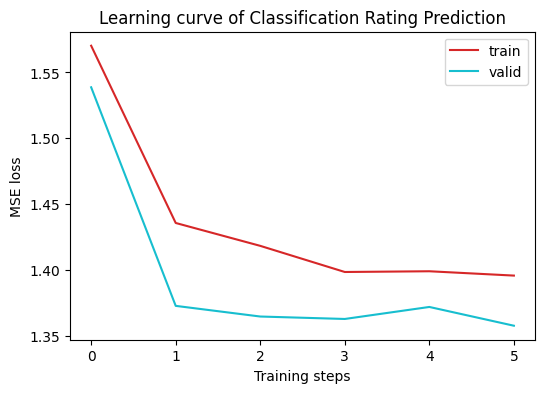

In [232]:
plot_learning_curve(loss_record, "Classification Rating Prediction")

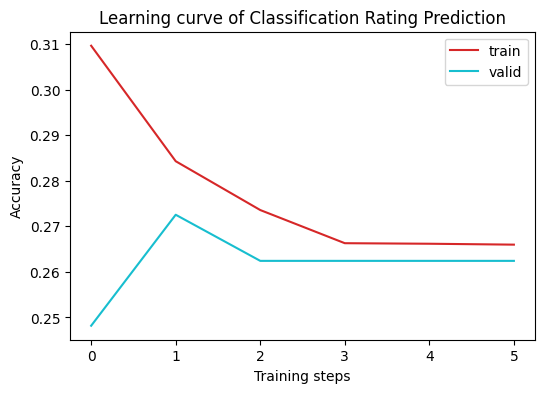

In [233]:
plot_learning_curve(acc_record, "Classification Rating Prediction", "Accuracy")

In [234]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

user_embed_matrix = ratingPredictor.user_embedding.weight.data.numpy()
rest_embed_matrix = ratingPredictor.restaurant_embedding.weight.data.numpy()
attr_embed_matrix = ratingPredictor.attributes_embedding.weight.data.numpy()

(11024, 30)
[[-0.09139854  0.00199248 -0.04729364  0.00779703 -0.494662    0.01791922
  -0.03534693  0.00201424  0.03788558 -0.0326215  -0.80230135 -0.15203321
   0.01039924  0.04395073  0.01000704 -0.05774527 -0.08463906 -0.03292789
  -0.01684783 -0.00377025  0.03392455  0.10567483  0.01621971 -0.0233927
  -0.01129463  0.03412221  0.07058837  0.18565328  0.06609983 -0.03897335]
 [-0.10410354 -0.11867148 -0.08861052 -0.01408822  0.02911659  0.13489968
  -0.08579703  0.03220689 -0.0948993  -0.03573015 -0.09870791  0.7915105
  -0.2762039  -0.01180166 -0.09194172 -0.3779659  -0.01349907  0.04928518
  -0.06004103 -0.0817358   0.00336212 -0.01143338  0.01612524  0.08915859
   0.00936588 -0.06669834  0.1719527   0.0833834  -0.04357028 -0.03357781]]


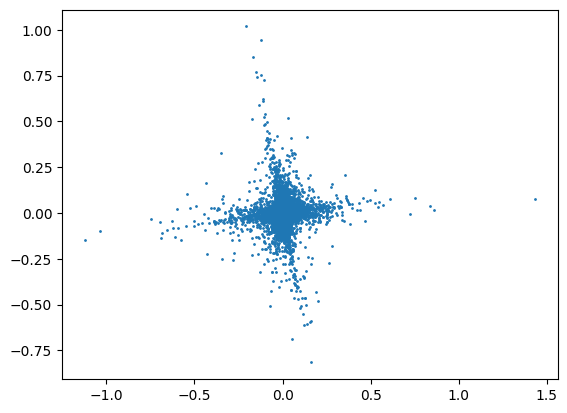

(1829, 30)
[[-0.00808972  0.27854845 -0.04144561  0.02585977 -0.06563772 -0.04546415
   0.00678581 -0.06060449  0.04047223  0.00197048  0.07263523  0.03840952
   0.01498701 -0.00395133 -0.4648652   0.03757372  0.07062021 -0.00260849
   0.02959887 -0.0992732   0.09330801 -0.03739355  0.02412737  0.02729707
   0.80953866 -0.01662498  0.00725065 -0.01351691 -0.00981021  0.02452979]
 [ 0.03300387  0.01228733  0.05250734  0.03872845  0.01646763  0.12497658
  -0.00832962 -0.02856105  0.01254243  0.04006229  0.04221168  0.1313974
   0.05440746  0.13268508 -0.7629221   0.06644069 -0.03620689  0.03359038
   0.04682294 -0.00681941  0.02806918 -0.00422412  0.23970976  0.23630734
  -0.46779612 -0.01453212  0.02688206 -0.0636135  -0.07836316 -0.03387785]]


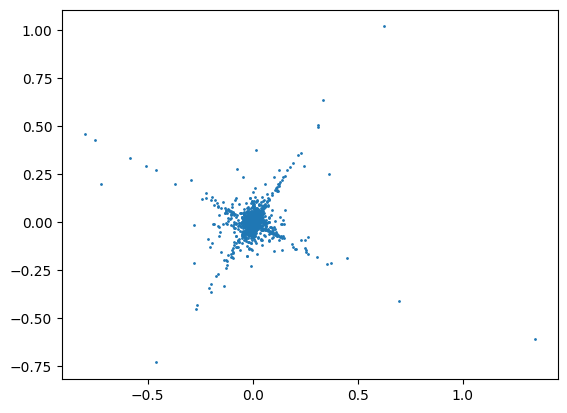

(8, 30)
[[-1.22668445e-02 -1.99546814e-02  1.76691654e-04  2.06156865e-01
   5.00434816e-01 -1.80847257e-01  3.92516404e-02  3.93186450e-01
  -3.84999663e-02 -9.62231383e-02 -2.16498692e-03 -2.54383862e-01
  -2.90093198e-02 -9.87885892e-02 -2.14859936e-02 -4.31058258e-02
   1.04585430e-02  2.50226399e-03 -1.28144860e-01 -3.70273665e-02
  -6.30474210e-01  7.04723448e-02  2.11011593e-05 -8.75991583e-02
  -1.04167312e-02  1.07067940e-03 -1.06248306e-02 -3.18853259e-02
  -2.36638496e-03  2.38449266e-03]
 [ 2.22243071e-02  1.44796744e-01 -4.20764991e-04  1.99844494e-01
   3.08594793e-01 -2.62595892e-01  4.96403873e-02  3.64776671e-01
   1.31349592e-02 -1.13165468e-01 -5.50448615e-03  6.00520372e-01
   4.47815284e-02 -8.30114037e-02  3.96388918e-02 -6.57765567e-02
  -2.67264880e-02 -5.94080472e-03 -1.62076354e-01 -4.92869392e-02
   4.21820819e-01 -1.71787232e-01  1.18466487e-05 -7.90480673e-02
   2.49454603e-02 -8.39025131e-04  2.63043568e-02  7.66026005e-02
   6.00116048e-03 -1.00755207e-02

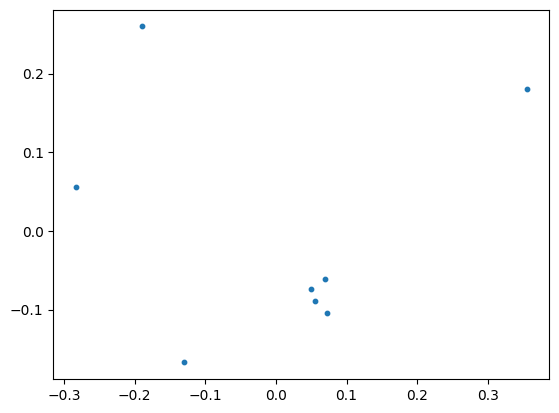

In [235]:
def visualize_embed(matrix, s=1):
    # Apply PCA to reduce the dimensionality of the embeddings to 3
    pca = PCA(n_components=2)
    embedding_pca = pca.fit_transform(matrix)
    print(matrix.shape)
    print(pca.components_)
    # Plot the embeddings using a scatter plot
    plt.scatter(embedding_pca[:, 0], embedding_pca[:, 1], s=s)
    plt.show()
visualize_embed(user_embed_matrix)
visualize_embed(rest_embed_matrix)
visualize_embed(attr_embed_matrix, s = 10)

In [236]:
rating_predictor = torch.load('class_rating.pth')
rating_predictor.eval()

# Create input tensors for a single example
user = torch.tensor([0])
restaurant = torch.tensor([1])
attributes = torch.tensor([0, 1, 2, 3, 1, 1, 1, 1])

# Make a prediction using the model
rating = rating_predictor(user, restaurant, attributes, minmax=(0, 5))

# Print the predicted rating
print(f"Predicted rating: {rating.item()}")

Predicted rating: 4.267698287963867
